In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("Walmart.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
# Normalize weekly sales per store using groupby to avoid SettingWithCopyWarning and improve performance
def _normalize_weekly_sales(x):
    denom = x.max() - x.min()
    if denom == 0:
        return pd.Series(0, index=x.index)
    return (x - x.min()) / denom

df['Weekly_Sales_Norm'] = df.groupby('Store')['Weekly_Sales'].transform(_normalize_weekly_sales)

In [6]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_Norm
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,0.090054
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,0.109086
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,0.110033
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,0.094700
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667,0.134259


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


A need to convert the Date of type (object) to Datetime object

In [5]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Data is widely distributed, with different features having different magnitudes

In [6]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

No null values present in the dataset

Exploaring distribution of features

In [7]:
df.columns.to_list()

['Store',
 'Date',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

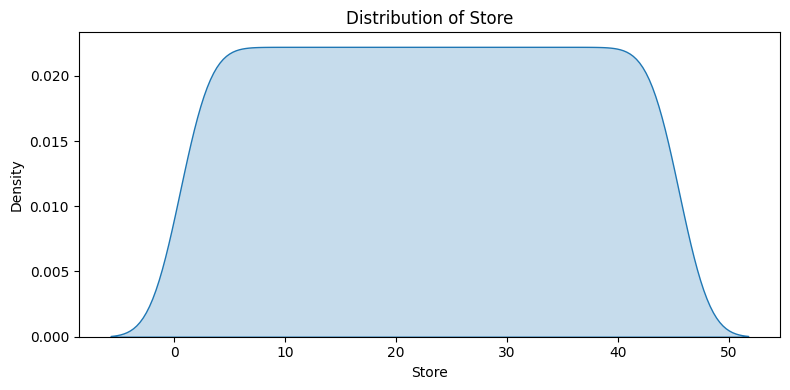

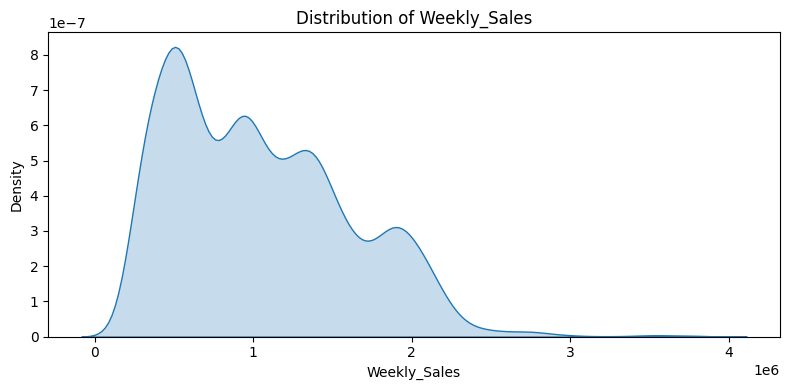

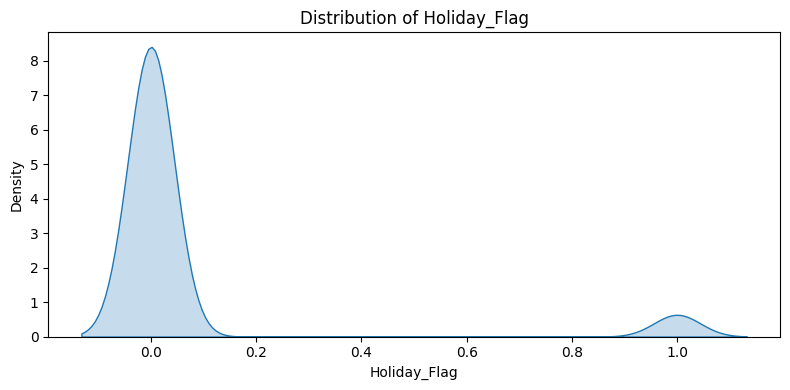

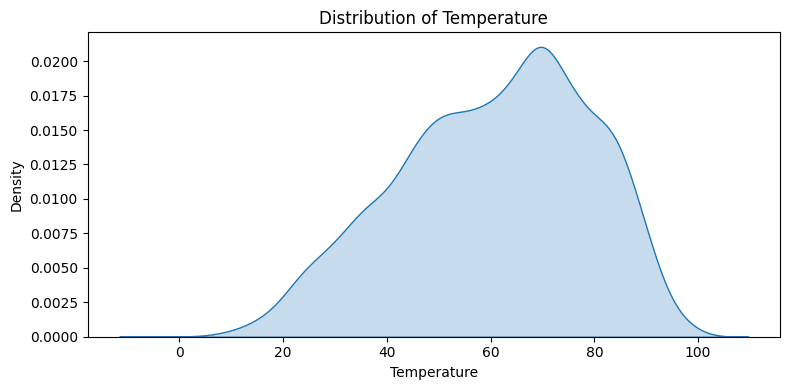

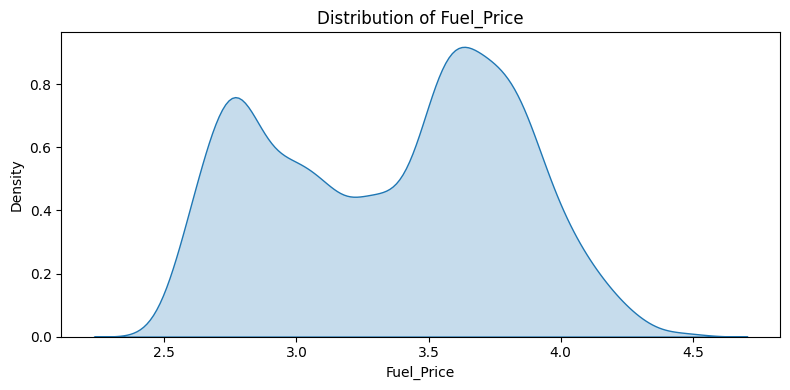

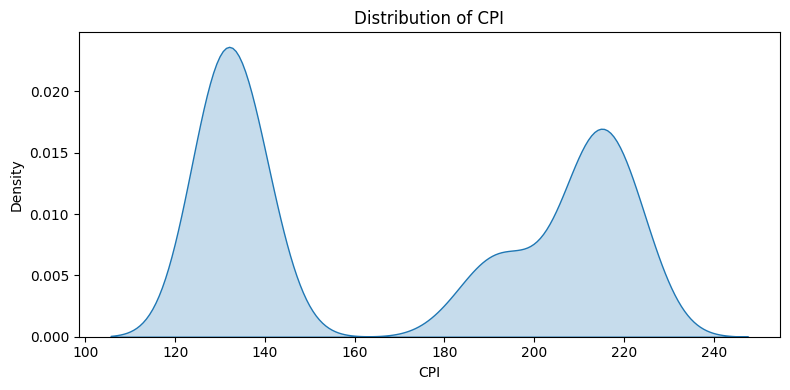

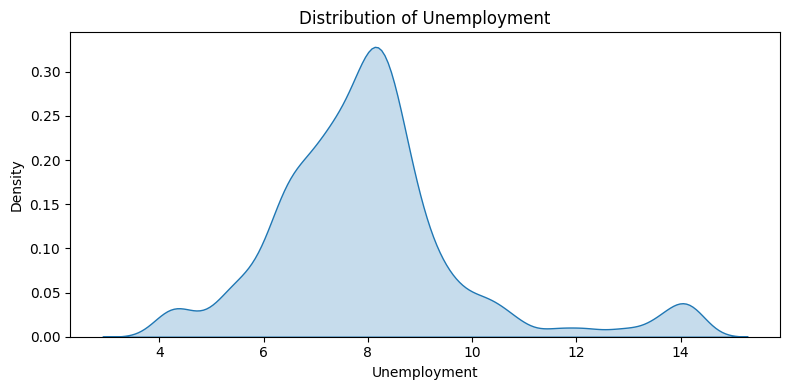

In [8]:
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df[col], fill=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

The feature `Holiday` is mapped as `0: no_holiday` and `1: holiday`.

The following box plot infers `Holiday` has no effect on the weekly sales of Walmart

<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

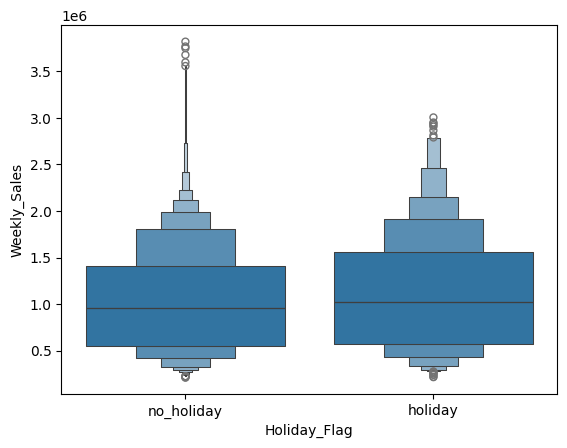

In [9]:
sns.boxenplot(data=df, x=df["Holiday_Flag"].map({0:"no_holiday", 1:"holiday"}), y=df["Weekly_Sales"])

The code plots the distribution of `Weekly Sales` for each `Store`

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

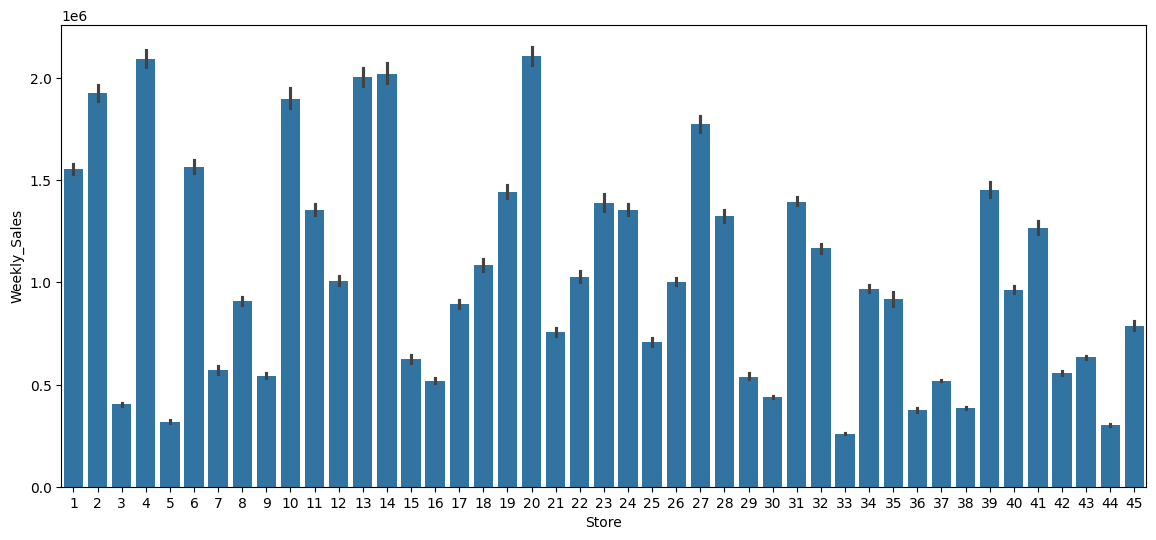

In [10]:
store_sales = (df.groupby('Store')['Weekly_Sales'].sum().reset_index())

plt.figure(figsize=(14, 6))
sns.barplot(data=store_sales, x=df["Store"], y=df["Weekly_Sales"])


<Axes: xlabel='Date', ylabel='Weekly_Sales'>

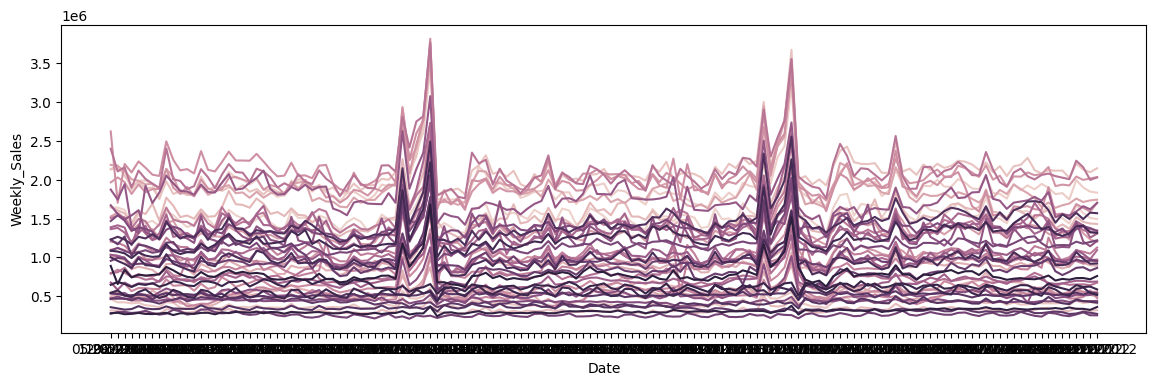

In [11]:
plt.figure(figsize=(14, 4))
sns.lineplot(data=df, x=df['Date'], y=df['Weekly_Sales'], hue=df['Store'], legend=False, estimator="mean")

<Axes: xlabel='Date', ylabel='Weekly_Sales_Norm'>

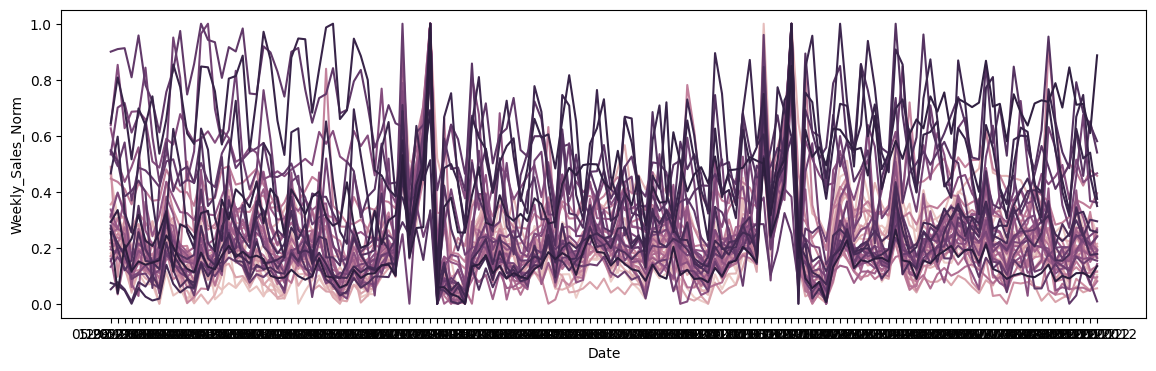

In [7]:
plt.figure(figsize=(14, 4))
sns.lineplot(data=df, x=df['Date'], y=df['Weekly_Sales_Norm'], hue=df['Store'], legend=False, estimator="mean")

<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

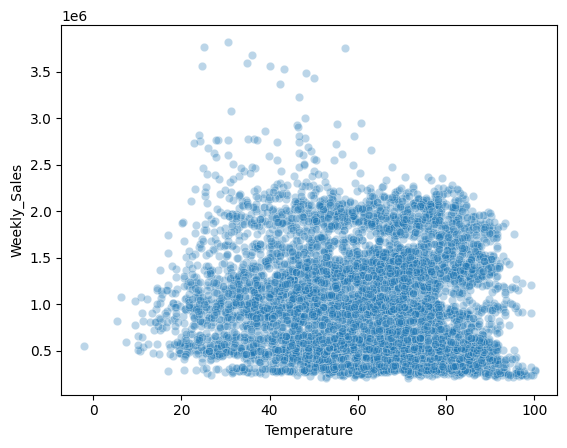

In [13]:
sns.scatterplot(x=df["Temperature"], y=df["Weekly_Sales"], alpha=0.3)

<Axes: >

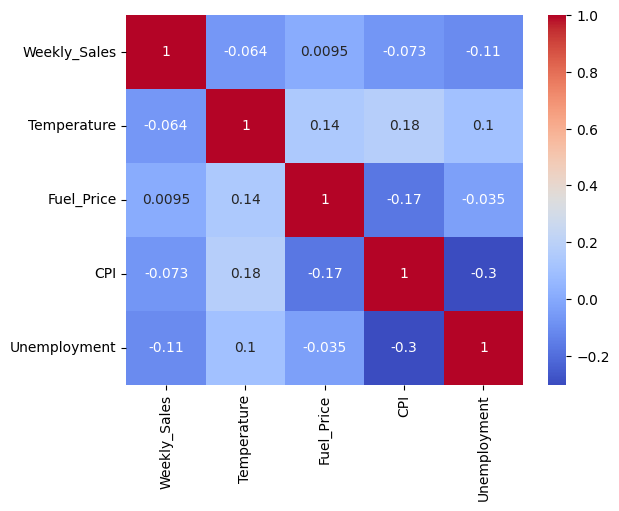

In [14]:
corr = df[[
    "Weekly_Sales",
    "Temperature",
    "Fuel_Price",
    "CPI",
    "Unemployment"
]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")


<Axes: xlabel='Date', ylabel='CPI'>

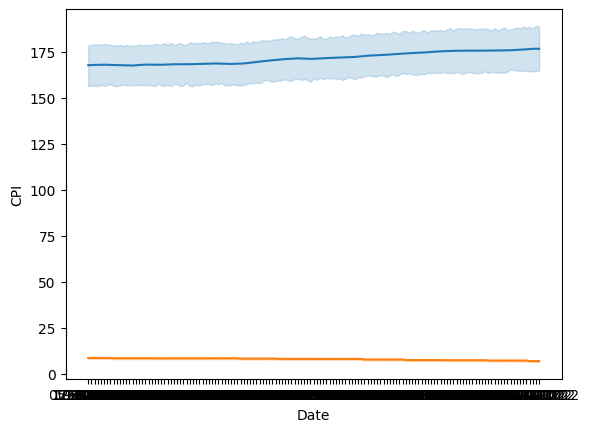

In [15]:
sns.lineplot(data=df, x="Date", y="CPI")
sns.lineplot(data=df, x="Date", y="Unemployment")

C:\Users\prana\AppData\Local\Temp\ipykernel_21336\2443271482.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


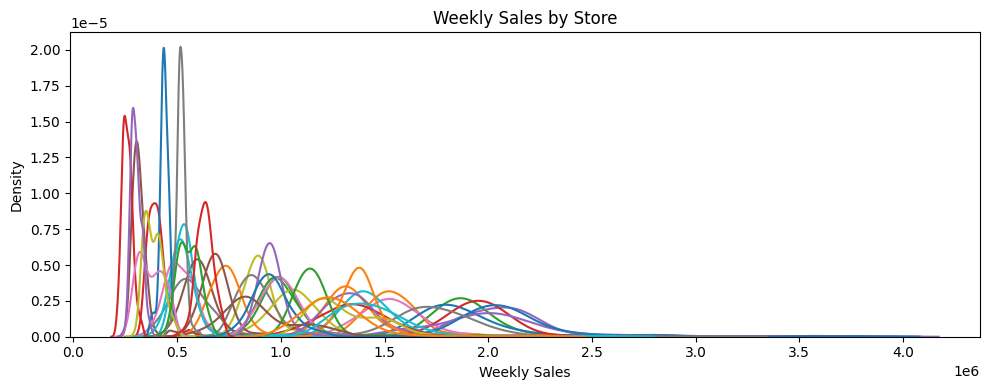

In [34]:
plt.figure(figsize=(10, 4))
for i in range(len(df['Store'].unique())):
    sns.kdeplot(
        data=df[df["Store"] == i],
        x="Weekly_Sales",
    )
plt.title('Weekly Sales by Store')
plt.xlabel('Weekly Sales')
plt.ylabel('Density')
plt.tight_layout()

The following boxplot hints the removal of outliers present in the data, which will be clearned in the EDA notebook

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

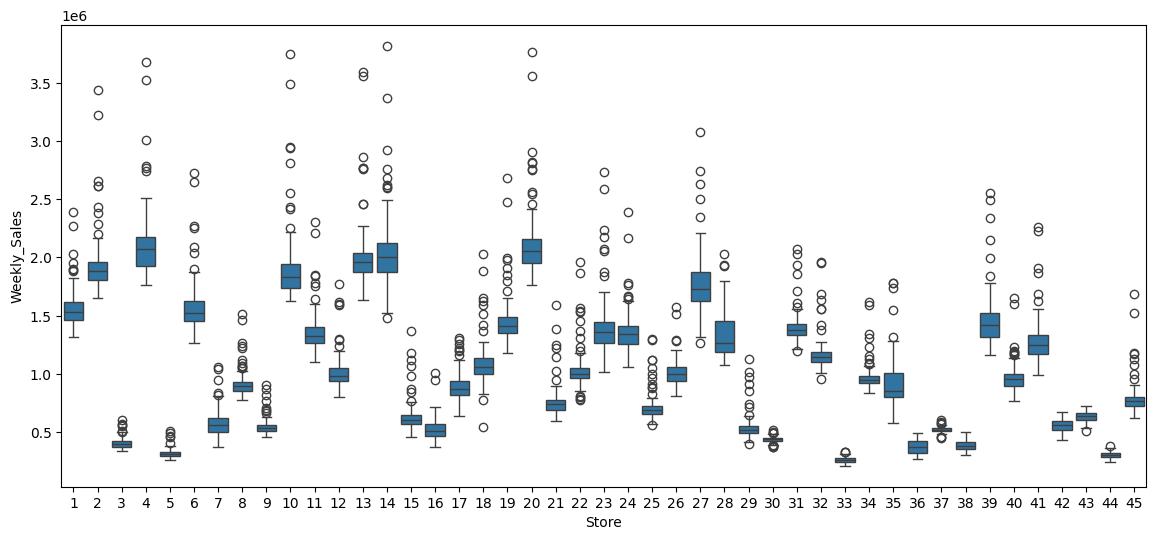

In [12]:
plt.figure(figsize=(14, 6))

sns.boxplot(
    data=df,
    x=df["Store"],
    y=df["Weekly_Sales"]
)
